In [3]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\HP\AppData\Local\Temp\ipykernel_110324\2550103747.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER, start="1993-01-01")
[*********************100%***********************]  1 of 1 completed


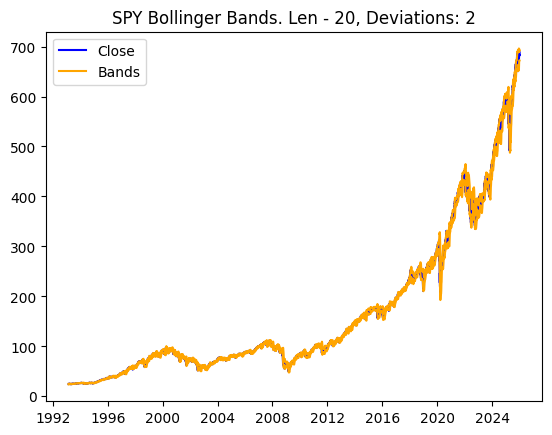

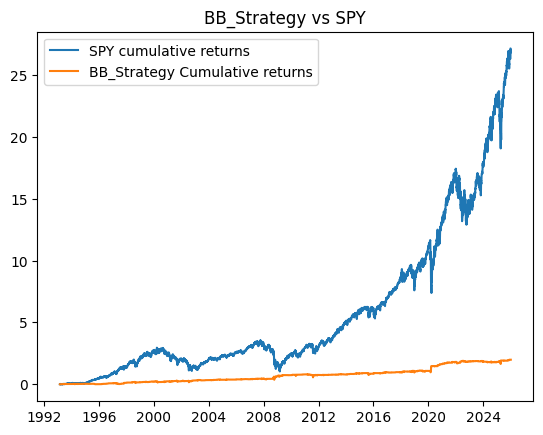

In [27]:
TICKER = 'SPY'
BB_LEN = 20
DEVS = 3
LOOKBACK = 10000

def get_data(TICKER):
    df = yf.download(TICKER, start="1993-01-01") 
    df.columns = df.columns.get_level_values(0)

    # only return the subset of data you are interested in
    return df.iloc[-LOOKBACK:, :]

def add_bollinger_bands(df, devs = DEVS, bb_len = BB_LEN):

    #can change to ema (use MACD video/ code for reference)
    df['BB_SMA'] = df['Close'].rolling(bb_len).mean()

    # get the standard deviation of the close prices for the periods
    df['BB_STD'] = df['Close'].rolling(bb_len).std()

    df['Upper_Band'] = df['BB_SMA'] + (devs * df['BB_STD'])
    df['Lower_Band'] = df['BB_SMA'] - (devs * df['BB_STD'])

    df = df.dropna()

    plt.plot(df['Close'], color = 'blue')
    plt.plot(df['Upper_Band'], color = 'orange')
    plt.plot(df['Lower_Band'], color = 'orange')
    plt.legend(['Close', 'Bands'])
    plt.title(f'{TICKER} Bollinger Bands. Len - {BB_LEN}, Deviations: {STD_DEV}')

    return df.dropna()

def add_strategy(df):
    df['Strategy'] = 0
    df['Strategy'] = np.where(df['Close'] > df['Upper_Band'], -1,
                     np.where(df['Close'] < df['Lower_Band'], 1, 0))
    
    df['Strategy'] = df['Strategy'].shift(1)

    return df

def test_strategy(df):
    df['Asset_Returns'] = (1+ df['Close'].pct_change()).cumprod() - 1
    df['Strategy_Returns'] = (1+ df['Close'].pct_change() * df['Strategy']).cumprod() - 1

    plt.figure()
    plt.plot(df['Asset_Returns'])
    plt.plot(df['Strategy_Returns'])
    plt.legend([f'{TICKER} cumulative returns', 'BB_Strategy Cumulative returns'])
    plt.title(f'BB_Strategy vs {TICKER}')

    return df




def main():
    df = get_data(TICKER)
    df = add_bollinger_bands(df, devs = STD_DEV, bb_len = BB_LEN)
    df = add_strategy(df)
    df = test_strategy(df)

    return df
df = main()



In [16]:
df

Price,Close,High,Low,Open,Volume,BB_SMA,BB_STD,Upper_Band,Lower_Band,Strategy,Asset_Returns,Strategy_Returns
Date,,,,,,,,,,,,
2024-02-02,66.123169,66.562919,63.654539,63.938381,476578000,58.312263,4.374834,67.061932,49.562594,NaN,NaN,NaN
2024-02-05,69.293396,69.458305,67.167581,68.187010,680078000,59.323450,4.462439,68.248329,50.398571,0.0,0.047944,0.000000
2024-02-06,68.185020,69.715166,66.263094,69.591235,683111000,60.121506,4.552269,69.226044,51.016968,-1.0,0.031182,0.015995
2024-02-07,70.059952,70.180887,67.562343,68.280945,495575000,60.968983,4.751691,70.472365,51.465601,0.0,0.059537,0.015995
2024-02-08,69.602226,70.754584,69.416333,70.034984,414422000,61.733107,4.853840,71.440788,52.025427,0.0,0.052615,0.015995
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-26,190.529999,192.690002,188.000000,189.919998,139740300,181.304503,5.180023,191.664549,170.944456,0.0,1.881441,0.221680
2025-12-29,188.220001,188.759995,185.910004,187.710007,120006100,181.865996,5.295108,192.456211,171.275781,0.0,1.846506,0.221680
2025-12-30,187.539993,188.990005,186.929993,188.240005,97687300,182.247496,5.420150,193.087797,171.407195,0.0,1.836222,0.221680
